1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Solution with minimize(x0=[0, 0]) is: ( 0.0 , 0.0 )
Solution with minimize(x0=[0, 0,75]) is: ( 0.08984201020477524 , -0.7126564216963296 )
basinhopping finds two global minima (0.08984201020477522 -0.7126564216963296) and (-0.08984201461662285 0.7126564044226885)


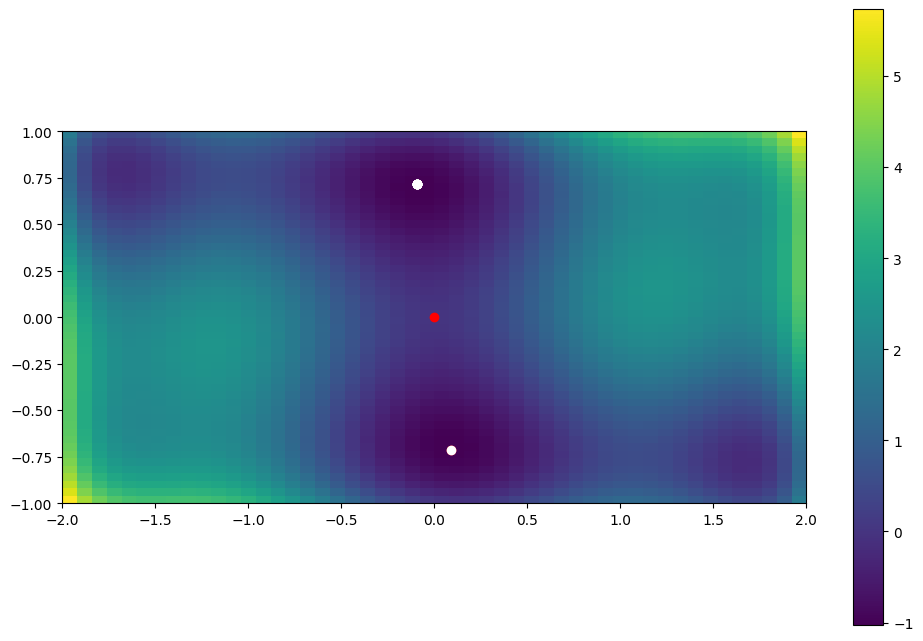

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from scipy.optimize import shgo
from scipy import optimize

#Plot the function
def f(x):
    return (4-2.1*(x[0]**2)+((x[0]**4))/3)*x[0]**2 +x[0]*x[1] + (4*x[1]**2 -4)*x[1]**2

plt.figure(figsize=(12,8))
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x1, y1 = np.meshgrid(x, y)
plt.imshow(f([x1, y1]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()


#Find minima and plot it
minima = optimize.minimize(f, x0=[0, 0])
plt.scatter(minima.x[0], minima.x[1], color='r')      # point (0,0) seems to be a local minima, but not a global one 
print("Solution with minimize(x0=[0, 0]) is: (", minima.x[0],",", minima.x[1],")")

minima = optimize.minimize(f, x0=[0, -0.75])
plt.scatter(minima.x[0], minima.x[1], color='r')      # point (0,-0.75) seems to be a true global minima
print("Solution with minimize(x0=[0, 0,75]) is: (", minima.x[0],",", minima.x[1],")")
#
for i in range(10):
    minima = basinhopping(f, x0=[0, 0])
    plt.scatter(minima.x[0], minima.x[1], color='w')
    #print("Solution with basinhopping(x0=[0, 0]) is:", minima.x[0], minima.x[1]) 
    
print("basinhopping finds two global minima (0.08984201020477522 -0.7126564216963296) and (-0.08984201461662285 0.7126564044226885)")



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

Hares peak frequency: 0.09523809523809523 
Lynxes peak frequency: 0.09523809523809523

Hares population period: 10.5 
Lynxes population period: 10.5


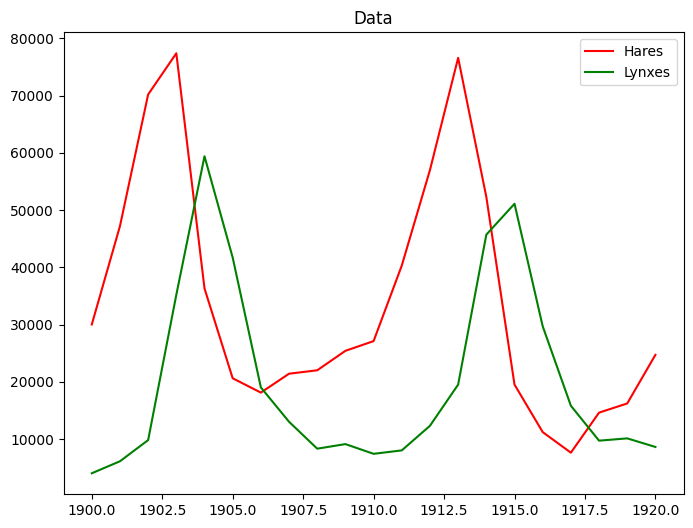

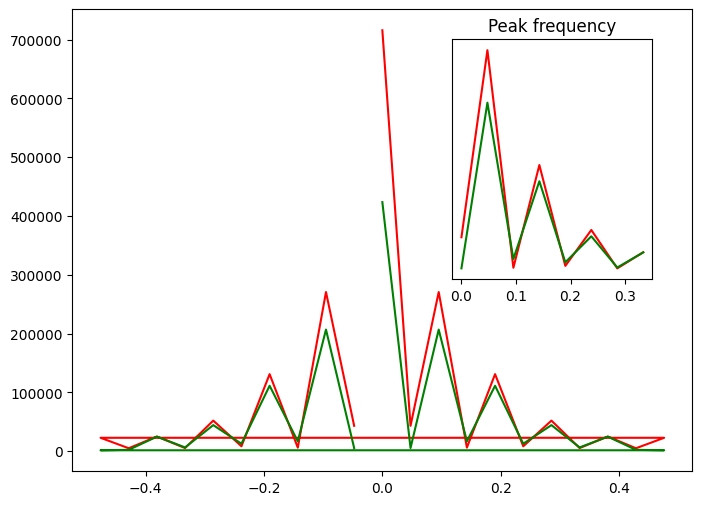

In [2]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt 

# Read and plot the data 
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T
plt.figure(figsize=(8,6))
plt.plot(year, hares, color='r', label='Hares')
plt.plot(year, lynxes, color='g', label='Lynxes')
plt.title('Data')
plt.legend(loc='best')

# Perform FFT
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)

sample_freq = fftpack.fftfreq(hares.size, d=1)

# Plot the Fourier Transform
plt.figure(figsize=(8,6))
plt.plot(sample_freq,power_hares, color='r')
plt.plot(sample_freq,power_lynxes, color='g')

# Compute the peak frequency
pos_mask = np.where(sample_freq > 0)
pos_freq = sample_freq[pos_mask]
power_hares = power_hares[pos_mask]
power_lynxes = power_lynxes[pos_mask]

peak_hares = pos_freq[power_hares.argmax()]
peak_lynxes = pos_freq[power_lynxes.argmax()]

axes = plt.axes([0.6, 0.43, 0.25, 0.4])
plt.title('Peak frequency')
plt.plot(sample_freq[:8], power_hares[:8], color='r')
plt.plot(sample_freq[:8], power_lynxes[:8], color='g')
plt.setp(axes, yticks=[])

print("Hares peak frequency:", peak_hares, "\nLynxes peak frequency:", peak_lynxes)

print("\nHares population period:", 1/peak_hares, "\nLynxes population period:", 1/peak_lynxes)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image - Method 2')

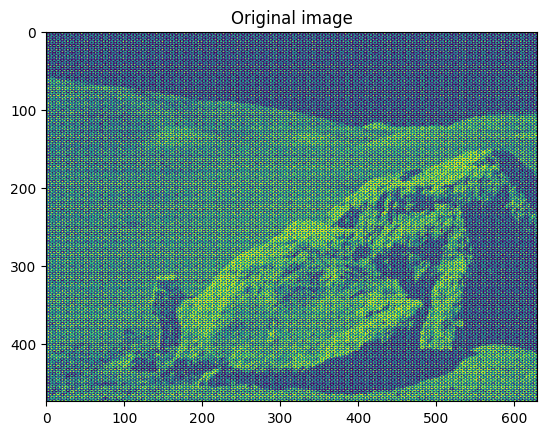

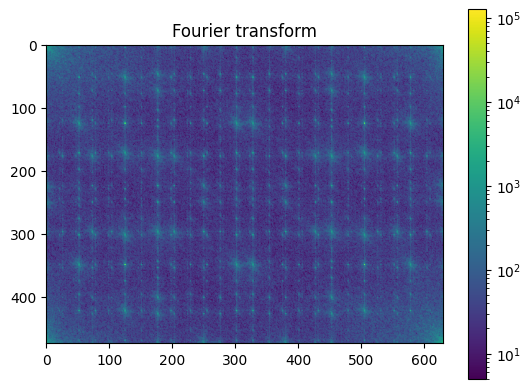

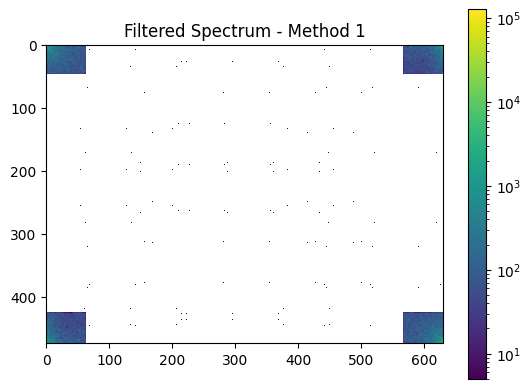

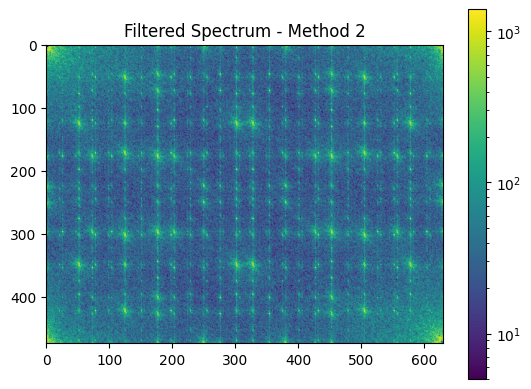

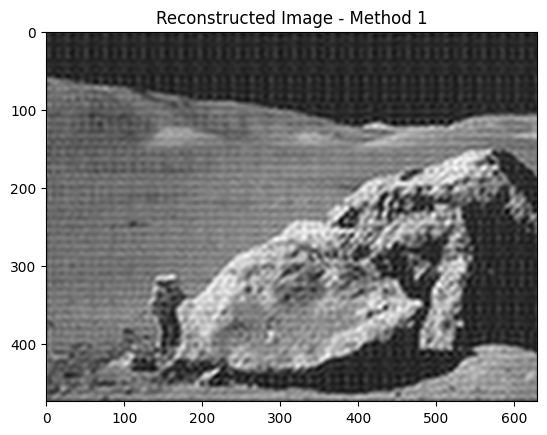

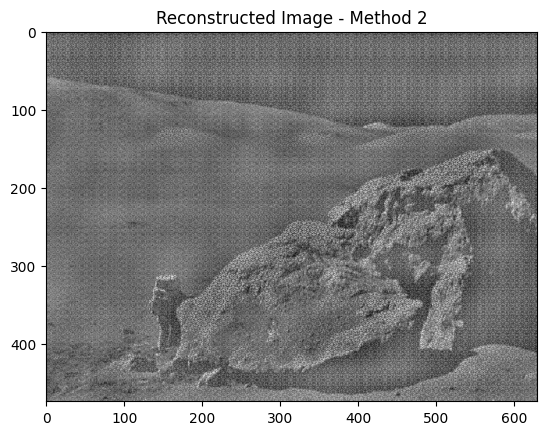

In [3]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# APPLY FFT
img = plt.imread("images/moonlanding.png")
original = plt.figure()
plt.imshow(img)
plt.title('Original image')
img_fft = fftpack.fft2(img)

# PLOT THE FFT RESULTING IMAGE
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
fft_fig = plt.figure()
plot_spectrum(img_fft)
plt.title('Fourier transform')

# IMAGE DENOISING
img_fft1 = img_fft.copy()
r, c = img_fft.shape


# METHOD 1: keeping only corners of the fft
keep_fraction = 0.1
img_fft1[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_fft1[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

cleaned1 = plt.figure()
plot_spectrum(img_fft1)
plt.title('Filtered Spectrum - Method 1')

# METHOD 2: removing highest values in the fft (blurring)
img_fft2 = img_fft.copy()
for i in range(r):
    for j in range(c):
        if (np.abs(img_fft2[i, j]) > 1400):
            img_fft2[i, j] = 0.05

cleaned2 = plt.figure()
plot_spectrum(img_fft2)
plt.title('Filtered Spectrum - Method 2')


# RECONSTRUCT THE IMAGES AND PLOT 

im_new1 = fftpack.ifft2(img_fft1).real
result1 = plt.figure()
plt.imshow(im_new1, plt.cm.gray)
plt.title('Reconstructed Image - Method 1')

im_new2 = fftpack.ifft2(img_fft2).real
result2 = plt.figure()
plt.imshow(im_new2, plt.cm.gray)
plt.title('Reconstructed Image - Method 2')